In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import nbinom
from tqdm.notebook import trange, tqdm
import seaborn as sns 
import pandas as pd
import noisets
from noisets import noisettes as ns
import scipy.stats as stats

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"]})

plt.rc('xtick', labelsize = 18)
plt.rc('ytick', labelsize = 18)

from matplotlib import cm, colors, colorbar
cmap = cm.get_cmap('viridis_r')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def trans(x):
    a = 18/57
    b = 1
    return (x-a)/(b-a) 

## Scatter-plots

In [3]:
# Load data 
path = '../Data-sets/Data/'
filename1 = 'YB14_pre0_F1_.txt' # first biological replicate
filename2 = 'YB14_pre0_F2_.txt' # second biological replicate
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

# Biological Replicates aka static scatter-plots
cl_P9_static = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , cl_P9_static.filename1)
print("Second Filename is : ",  cl_P9_static.filename2)
print("Name of the columns of first file are : ", cl_P9_static.colnames1)
print("Name of the columns of second file are : ", cl_P9_static.colnames2)

# Repertoires dynamics
filename1 = 'YB_45_F_.txt' # first biological replicate
filename2 = 'YB14_pre0_F2_.txt' # second biological replicate
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

cl_P9_dyn = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , cl_P9_dyn.filename1)
print("Second Filename is : ",  cl_P9_dyn.filename2)
print("Name of the columns of first file are : ", cl_P9_dyn.colnames1)
print("Name of the columns of second file are : ", cl_P9_dyn.colnames2)

First Filename is :  YB14_pre0_F1_.txt
Second Filename is :  YB14_pre0_F2_.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
First Filename is :  YB_45_F_.txt
Second Filename is :  YB14_pre0_F2_.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']


In [4]:
# Import data 
n_rep, df_rep = cl_P9_static.import_data()
n_dyn, df_dyn = cl_P9_dyn.import_data()

/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:99: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


[2.5e-07, 0.1, 2.5e-07, 0.1]

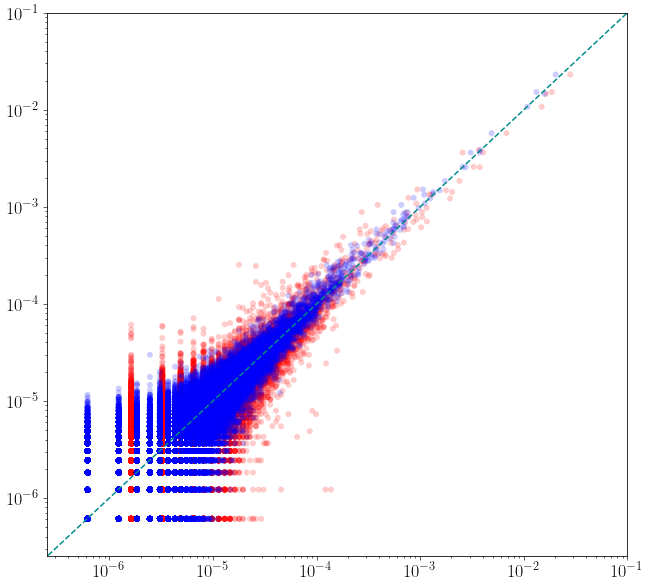

In [5]:
fig, ax = plt.subplots(figsize=(10.4,10))

X = np.linspace(0,1, 1000)
ax.scatter(df_dyn['Clone_fraction_1'], df_dyn['Clone_fraction_2'], c='red', alpha = 0.2 ,edgecolor='None', rasterized = True, label = r'samples 1 year apart')
ax.scatter(df_rep['Clone_fraction_1'], df_rep['Clone_fraction_2'], c='blue', alpha = 0.2 ,edgecolor='None', rasterized = True, label = r'biological replicates same day')
ax.xaxis.set_tick_params( length=4, width=.6)
ax.yaxis.set_tick_params( length=4, width=.6)
ax.plot(X,X, linestyle ='--', color ='darkcyan')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])
#fig.savefig('/Users/bensouda/Documents/Scatter_plot_replicates.pdf')

## Cumulative frequency distributions

In [6]:
##Russian_dat
path = '../Data-sets/Data/'
filename1_S1_F1 = 'S1_45_F1_.txt'
filename2_S1_F1 = 'S1_730_F1_.txt'
filename1_S1_F2 = 'S1_45_F2_.txt'
filename2_S1_F2 = 'S1_730_F2_.txt'

filename1_S2_F1 = 'S2_45_F1_.txt'
filename2_S2_F1 = 'S2_730_F1_.txt'
filename1_S2_F2 = 'S2_45_F2_.txt'
filename2_S2_F2 = 'S2_730_F2_.txt'

filename1_d1 = 'Patient_1_0_F1_.txt'
filename2_d1 = 'Patient_1_1095_F1_.txt'

filename1_d2 = 'Patient_2_0_F1_.txt'
filename2_d2 = 'Patient_2_1095_F1_.txt'

filename_YB = 'YB_45_F_.txt'

df_S1_F1 = pd.read_csv(path+filename1_S1_F1, sep = '\t')
df_S1_F2 = pd.read_csv(path+filename1_S1_F2, sep = '\t')
df_S2_F1 = pd.read_csv(path+filename1_S2_F1, sep = '\t')
df_S2_F2 = pd.read_csv(path+filename1_S2_F2, sep = '\t')
df_YB = pd.read_csv(path+filename_YB, sep = '\t')
df_d1 = pd.read_csv(path+filename1_d1, sep = '\t')
df_d2 = pd.read_csv(path+filename1_d2, sep = '\t')

##ReVAX data
path_MP = '../Data-sets/Minervina_YF_revax/'

#P6_alpha
filename1_MP_F1_alpha = 'MP_45_F1_alpha.txt'
filename1_MP_F2_alpha = 'MP_45_F2_alpha.txt'
filename2_MP_F1_alpha = 'MP_365_F1_alpha.txt'
filename2_MP_F2_alpha = 'MP_365_F2_alpha.txt'

#P6_beta
filename1_MP_F1_beta = 'MP_45_F1_beta.txt'
filename1_MP_F2_beta = 'MP_45_F2_beta.txt'
filename2_MP_F1_beta = 'MP_365_F1_beta.txt'
filename2_MP_F2_beta = 'MP_365_F2_beta.txt'

df_MPa_F1 = pd.read_csv(path_MP+filename1_MP_F1_alpha, sep = '\t')
df_MPa_F2 = pd.read_csv(path_MP+filename1_MP_F2_alpha, sep = '\t')
df_MPb_F1 = pd.read_csv(path_MP+filename1_MP_F1_beta, sep = '\t')
df_MPb_F2 = pd.read_csv(path_MP+filename1_MP_F2_beta, sep = '\t')

#Harlan_Robins_data
path_HR = '../Data-sets/Data_Harlan_Robins_Zuzia/'

filename1_Patient1 = 'S1_0_F1_.txt'
filename1_Patient2 = 'S2_0_F1_.txt'
filename1_Patient3 = 'S3_0_F1_.txt'

df_Patient1 = pd.read_csv(path_HR+filename1_Patient1, sep = '\t')
df_Patient2 = pd.read_csv(path_HR+filename1_Patient2, sep = '\t')
df_Patient3 = pd.read_csv(path_HR+filename1_Patient3, sep = '\t')

df_Patient1['fraction'] = df_Patient1['Clone fraction']/100
df_Patient2['fraction'] = df_Patient2['Clone fraction']/100
df_Patient3['fraction'] = df_Patient3['Clone fraction']/100

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
## Cumulative frequencies distributions

def cumulative_distributions_bis(df, Clone_fraction):
    
    df_true = df[df[Clone_fraction] != 0]
    df_true_new = df_true.copy()
    df_true_new['Id'] = 1
    distribution = df_true_new.groupby([Clone_fraction])['Id'].sum()
    frequencies = df_true_new[Clone_fraction].unique()
    frequencies = sorted(frequencies)
    
    x_Patient = np.log(frequencies)
    y_Patient = np.log(np.max(np.cumsum(distribution)) - np.cumsum(distribution))
    y_Patient_vec = y_Patient.values
    
    slope_Patient, intercept_Patient, r_value_Patient, p_value_Patient, std_err_Patient = stats.linregress(x_Patient[:-1], y_Patient_vec[:-1])
    Y_Patient = intercept_Patient + slope_Patient*np.array(x_Patient)
    return frequencies, x_Patient, y_Patient, slope_Patient, intercept_Patient, Y_Patient

In [8]:
#HR
frequencies_1_Patient1, x_1_Patient1, y_1_Patient1, slope_1_Patient1, intercept_1_Patient1, Y_1_Patient1 = cumulative_distributions_bis(df_Patient1, 'fraction')
frequencies_1_Patient2, x_1_Patient2, y_1_Patient2, slope_1_Patient2, intercept_1_Patient2, Y_1_Patient2 = cumulative_distributions_bis(df_Patient2, 'fraction')
frequencies_1_Patient3, x_1_Patient3, y_1_Patient3, slope_1_Patient3, intercept_1_Patient3, Y_1_Patient3 = cumulative_distributions_bis(df_Patient3, 'fraction')

#P3
frequencies_1_S1_F1, x_1_S1_F1, y_1_S1_F1, slope_1_S1_F1, intercept_1_S1_F1, Y_1_S1_F1 = cumulative_distributions_bis(df_S1_F1, 'Clone fraction')
frequencies_1_S1_F2, x_1_S1_F2, y_1_S1_F2, slope_1_S1_F2, intercept_1_S1_F2, Y_1_S1_F2 = cumulative_distributions_bis(df_S1_F2, 'Clone fraction')

#P4
frequencies_1_S2_F1, x_1_S2_F1, y_1_S2_F1, slope_1_S2_F1, intercept_1_S2_F1, Y_1_S2_F1 = cumulative_distributions_bis(df_S2_F1, 'Clone fraction')
frequencies_1_S2_F2, x_1_S2_F2, y_1_S2_F2, slope_1_S2_F2, intercept_1_S2_F2, Y_1_S2_F2 = cumulative_distributions_bis(df_S2_F2, 'Clone fraction')

#MPalpha&beta
frequencies_1_MP_F1, x_1_MP_F1, y_1_MP_F1, slope_1_MP_F1, intercept_1_MP_F1, Y_1_MP_F1 = cumulative_distributions_bis(df_MPb_F1, 'Clone fraction')
frequencies_1_MP_F2, x_1_MP_F2, y_1_MP_F2, slope_1_MP_F2, intercept_1_MP_F2, Y_1_MP_F2 = cumulative_distributions_bis(df_MPb_F2, 'Clone fraction')

frequencies_1_MPa_F1, x_1_MPa_F1, y_1_MPa_F1, slope_1_MPa_F1, intercept_1_MPa_F1, Y_1_MPa_F1 = cumulative_distributions_bis(df_MPa_F1, 'Clone fraction')
frequencies_1_MPa_F2, x_1_MPa_F2, y_1_MPa_F2, slope_1_MPa_F2, intercept_1_MPa_F2, Y_1_MPa_F2 = cumulative_distributions_bis(df_MPa_F2, 'Clone fraction')

#P9
frequencies_1_YB, x_1_YB, y_1_YB, slope_1_YB, intercept_1_YB, Y_1_YB = cumulative_distributions_bis(df_YB, 'Clone fraction')

#P5andP8
frequencies_1_d1, x_1_d1, y_1_d1, slope_1_d1, intercept_1_d1, Y_1_d1 = cumulative_distributions_bis(df_d1, 'Clone fraction')
frequencies_1_d2, x_1_d2, y_1_d2, slope_1_d2, intercept_1_d2, Y_1_d2 = cumulative_distributions_bis(df_d2, 'Clone fraction')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


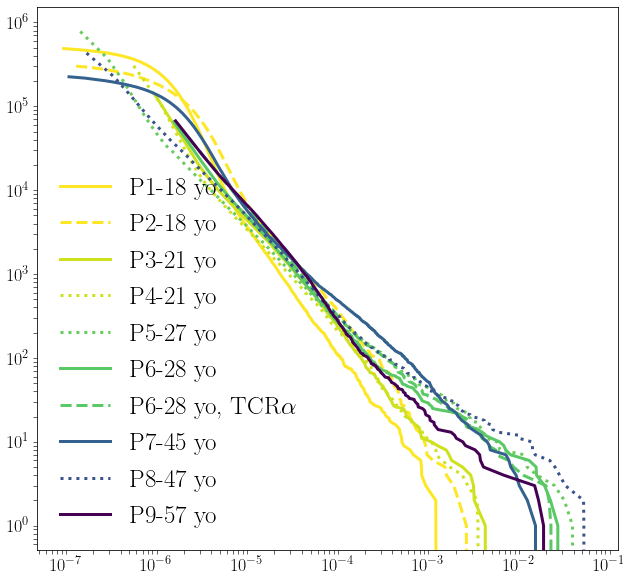

In [9]:
fig, ax = plt.subplots(figsize=(10.4,10))

ax.plot(frequencies_1_Patient1, np.exp(y_1_Patient1), color= cmap(trans(18/57)), linewidth = 3, label = r'P1-18 yo')
ax.plot(frequencies_1_Patient2, np.exp(y_1_Patient2), color= cmap(trans(18/57)), linewidth = 3, linestyle = '--', label = r'P2-18 yo')
ax.plot(frequencies_1_S1_F2, np.exp(y_1_S1_F2), color= cmap(trans(21/57)), linewidth = 3, linestyle = '-', label = r'P3-21 yo')
ax.plot(frequencies_1_S2_F1, np.exp(y_1_S2_F1), color= cmap(trans(21/57)), linewidth = 3, linestyle = 'dotted', label = r'P4-21 yo')
ax.plot(frequencies_1_d1, np.exp(y_1_d1), color= cmap(trans(27/57)), linewidth = 3, linestyle = 'dotted', label = r'P5-27 yo')
ax.plot(frequencies_1_MP_F2, np.exp(y_1_MP_F2), color= cmap(trans(28/57)), linewidth = 3, label = r'P6-28 yo')
ax.plot(frequencies_1_MPa_F2, np.exp(y_1_MPa_F2), color= cmap(trans(28/57)), linewidth = 3, linestyle = '--', label = r'P6-28 yo, TCR$\alpha$')
ax.plot(frequencies_1_Patient3, np.exp(y_1_Patient3), color= cmap(trans(45/57)), linewidth = 3, label = r'P7-45 yo')
ax.plot(frequencies_1_d2, np.exp(y_1_d2), color= cmap(trans(47/57)), linewidth = 3, linestyle = 'dotted', label = r'P8-47 yo')
ax.plot(frequencies_1_YB, np.exp(y_1_YB), color= cmap(trans(57/57)), linewidth = 3, label = r'P9-57 yo')

ax.xaxis.set_tick_params('both', length=4, width=.6)
ax.yaxis.set_tick_params('both', length=4, width=.6)
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(fontsize = 25, loc =3, frameon = False)

#fig.savefig('/Users/bensouda/Documents/PhD/Cumulative_freq_dist.pdf')